#Assignment 1 Q3

mounting

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')
drive_path = '/content/gdrive/MyDrive/Multimedia_Compression/HW1/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Libraries

In [22]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

1. Explain the Chroma subsampling technique, what do the different ratios mean?

**answer:** In the lecture, we learned about the Y Cr Cb representation triplet. It is derived by weighting the RGB components as follows:

$$Y=0.299R+0.587G+0.114B$$
$$Cr=128+0.713(R-Y)$$
$$Cb=128+0.564(B-Y)$$

This method enables higher compression efficiency. The human eye is more sensitive to luminance (Y) than to changes in color (Cr, Cb).

**Chroma Subsampling** is a technique where we sample less information from the color components while keeping the image visually clear.

For example, when given a ratio of 4:1:1, this represents the compression ratio for the color components compared to the luminance components. The compression ratio we can expect to achieve is approximately 2.

2. Take an image in RGB and convert it to YCrCb in a 4:1:1 ratio.

Take an image in RGB

In [23]:
image = cv2.imread(drive_path + 'smartphon image2.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


  Convert to YCrCb with 4:1:1 ratio

In [24]:
image_ycrcb = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)
height, width, _ = image_ycrcb.shape

# sample Cr Cb channels every 4 pixels using interpolation with the close neighboars pixels
cr_subsampled = cv2.resize(image_ycrcb[:, :, 1], (width // 4, height), interpolation=cv2.INTER_LINEAR)
cb_subsampled = cv2.resize(image_ycrcb[:, :, 2], (width // 4, height), interpolation=cv2.INTER_LINEAR)

# upsampling the Cr Cb channels in order to merge the 3 channels into 1 picture
cr_upsampled = cv2.resize(cr_subsampled, (width, height), interpolation=cv2.INTER_LINEAR)
cb_upsampled = cv2.resize(cb_subsampled, (width, height), interpolation=cv2.INTER_LINEAR)

y_channel, cr_channel, cb_channel = cv2.split(image_ycrcb)

image_subsampled = cv2.merge([y_channel, cr_upsampled, cb_upsampled])
# np.stack work perfect as well
#image_subsampled = np.stack([image_ycrcb[:, :, 0], cr_upsampled, cb_upsampled], axis=2)


3. Display the images next to each other

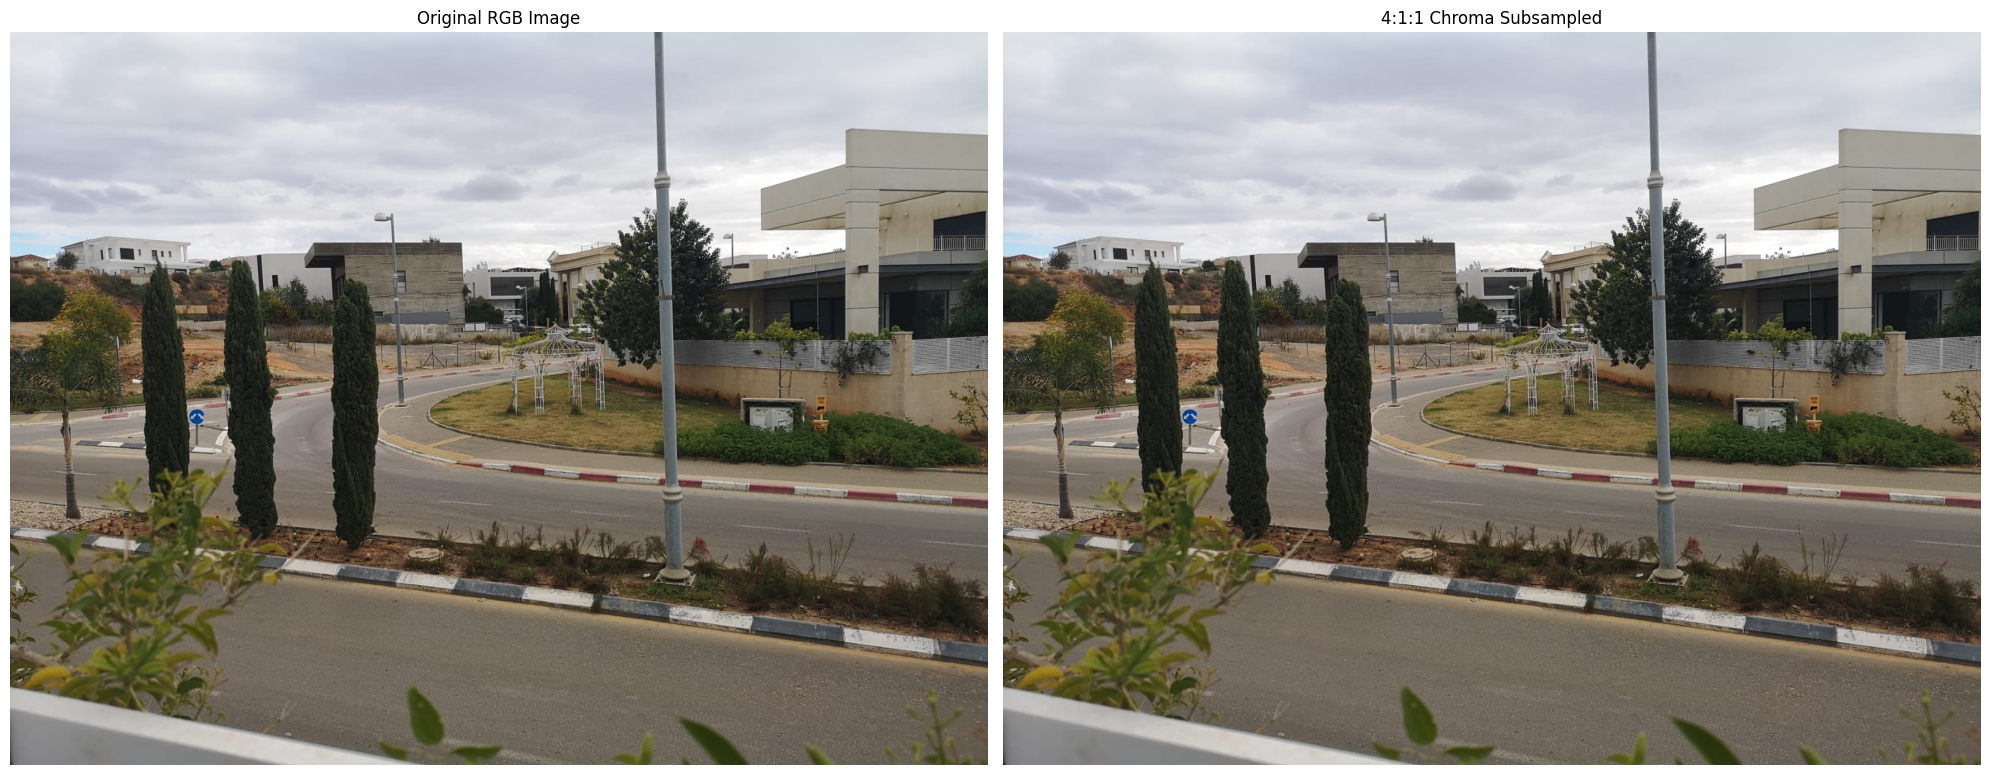

In [25]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_subsampled.astype(np.uint8), cv2.COLOR_YCrCb2RGB))
plt.title("4:1:1 Chroma Subsampled")
plt.axis("off")

plt.tight_layout()
plt.show()

4. Compare the images using quality metrics: MSE, SSIM.

SSIM MSE calculation

In [26]:
image_subsampled_rgb = cv2.cvtColor(image_subsampled.astype(np.uint8), cv2.COLOR_YCrCb2RGB)

mse = np.mean((image_rgb - image_subsampled_rgb) ** 2)
ssim_value = ssim(image_rgb, image_subsampled_rgb, multichannel=True, channel_axis = 2)

print(f"MSE: {mse}")
print(f"SSIM: {ssim_value}")

MSE: 0.26938697916666665
SSIM: 0.9991599946047924


5. Save the Chroma subsampling image and calculate the ratio between it and the original image in terms of image size in megabytes.

In [27]:
#save the compress picture
cv2.imwrite(drive_path+"subsampled_image.jpg", cv2.cvtColor(image_subsampled.astype(np.uint8), cv2.COLOR_YCrCb2BGR))

original_size = image.nbytes / (1024 * 1024)  # MB
subsampled_size = cr_subsampled.nbytes + cb_subsampled.nbytes + image_ycrcb[:, :, 0].nbytes #we can use y_channel as well
subsampled_size /= (1024 * 1024)  # MB

compression_ratio = original_size / subsampled_size
print(f"Original Size: {original_size:.2f} MB")
print(f"Subsampled Size: {subsampled_size:.2f} MB")
print(f"Compression Ratio: {compression_ratio:.2f}")

Original Size: 5.49 MB
Subsampled Size: 2.75 MB
Compression Ratio: 2.00
